# All Ireland M.bovis strain diversity and clade identification

In [283]:
import sys,os,io,shutil,subprocess
import glob
from importlib import reload
import numpy as np
import pandas as pd
pd.set_option('display.width', 200)
import pylab as plt
import matplotlib as mpl
from Bio import SeqIO
import seaborn as sns
sys.path.append('pathogenie')
from snipgenie import tools, aligners, app, trees, plotting
import toytree, toyplot
import toyplot.pdf
path = '/storage/btbgenie/all_ireland_results'

## get meta data

In [314]:
meta = pd.read_csv('/storage/btbgenie/mbovis_ireland/all_ireland_samples.csv')
print (len(meta))

583


In [336]:
dups=meta[meta.duplicated('aliquot')].dropna()
print (dups)
for i,r in dups.iterrows():
    print (meta[meta.aliquot== r.aliquot])
meta[(meta.batch.isin([2,3,4])) & (~meta.aliquot.isin(dups.aliquot)) & (meta.county=='Monaghan')]

          sample    county species  source  batch      aliquot
419  TB19-007328  Monaghan     Cow  Declan    2.0  TB19-007328
423  TB19-006784  Monaghan     Cow  Declan    2.0  TB19-006784
424  TB19-006656  Monaghan     Cow  Declan    2.0  TB19-006656
434  TB19-006246  Monaghan     Cow  Declan    2.0  TB19-006246
438  TB19-003263     Cavan     Cow  Declan    2.0  TB19-003263
439  TB19-003261     Cavan     Cow  Declan    2.0  TB19-003261
440  TB19-003260     Cavan     Cow  Declan    2.0  TB19-003260
471  TB19-002014  Monaghan     Cow   Kevin    3.0  TB19-002014
477  TB19-003377  Monaghan     Cow   Kevin    3.0  TB19-003377
479  TB19-003437  Monaghan     Cow   Kevin    3.0  TB19-003437
488  TB19-003738  Monaghan     Cow   Kevin    3.0  TB19-003738
489  TB19-003747  Monaghan     Cow   Kevin    3.0  TB19-003747
490  TB19-003762  Monaghan     Cow   Kevin    3.0  TB19-003762
495  TB19-003825  Monaghan     Cow   Kevin    3.0  TB19-003825
501  TB19-004238  Monaghan     Cow   Kevin    3.0  TB19

,sample,county,species,source,batch,aliquot
437,TB19-005728,Monaghan,Cow,Declan,2.0,TB19-005728
460,TB19-010920,Monaghan,Cow,Declan,2.0,TB19-010920
535,TB19-008567,Monaghan,Cow,Kevin,4.0,TB19-008567
536,TB19-005666,Monaghan,Cow,Kevin,4.0,TB19-005666
537,TB19-004282,Monaghan,Cow,Kevin,4.0,TB19-004282
538,TB19-007986,Monaghan,Cow,Kevin,4.0,TB19-007986


## run NI

In [ ]:
reload(app)
args = {'threads':20, 'outdir': '/storage/btbgenie/NI_results', 'labelsep':'_',
        'input':['/storage/btbgenie/mbovis_ireland/NI'],
         'species': 'Mbovis-AF212297',
         'overwrite':False,
         'custom_filters': True,       
         'buildtree':True}
W = app.WorkFlow(**args)
st = W.setup()
W.run()

## misc 2021 samples

In [ ]:
args = {'threads':20, 'outdir': '/storage/btbgenie/misc_results', 'labelsep':'_',
        'input':['/storage/btbgenie/mbovis_ireland/Misc'],
         'species': 'Mbovis-AF212297',
         'overwrite':False,
         'custom_filters': True,
         'buildtree':True}
W = app.WorkFlow(**args)
st = W.setup()
W.run()

In [ ]:
reload(app)
mask='/home/farrell/gitprojects/snipgenie/snipgenie/data/Mbovis_AF212297_mask.bed'
vcf_file='/storage/btbgenie/misc_results/snps.vcf.gz'
app.mask_filter(vcf_file, mask)

In [244]:
present=pd.read_csv('/storage/btbgenie/misc_results/summary.csv')
present['sample']=present['sample'].astype(str)
#print (present[:10])
l=list(W.fastq_table['sample'].unique())

s=meta[meta.batch>=3].sort_values(by='sample')
#s['label'] = s['sample'].apply(lambda x : x.split('-')[1][-4:]).astype(str)
#s=s.sort_values('label')

p = present[~present['sample'].isin(s['sample'])]
#p = (s[s['label'].isin(l)])
print (p)
print (len(s),len(p), len(present))

         sample                           name                                           bam_file  read_length
25  TB19-004280  TB19-004280_S68_L001-4_R2_001  /storage/btbgenie/misc_results/mapped/TB19-004...          149
48  TB19-005887  TB19-005887_S29_L001-4_R2_001  /storage/btbgenie/misc_results/mapped/TB19-005...          150
65 2 61


In [284]:
reload(trees)
spo=pd.read_csv('/storage/btbgenie/all_ireland_results/misc_spoligotypes.csv')
treefile = '/storage/btbgenie/misc_results/tree.newick'
tre = toytree.tree(treefile)
tipnames = tre.get_tip_labels()
mapping = dict(zip(meta['sample'],meta.county))
colormap = trees.colors_from_labels(meta,'name','county')
tip_colors = [colormap[mapping[i]] if i in mapping else 'Black' for i in tipnames]

canvas,t,r=tre.draw(layout='r',width=1000,height=1000,tip_labels_colors=tip_colors,
                    scalebar=True,);
toyplot.pdf.render(canvas,'/storage/btbgenie/all_ireland_results/misc_samples_tree.pdf')

## run CVRL samples

In [ ]:
args = {'threads':20, 'outdir': '/storage/btbgenie/cvrl_results', 'labelsep':'_',
        'input':['/storage/btbgenie/mbovis_ireland/CVRL'],
         'species': 'Mbovis-AF212297',
         'overwrite':False,
         'custom_filters': True,
         'buildtree':True}
W = app.WorkFlow(**args)
st = W.setup()
W.run()

In [ ]:
reload(trees)
spo=pd.read_csv('/storage/btbgenie/all_ireland_results/cvrl_spoligotypes.csv')
treefile = '/storage/btbgenie/cvrl_results/tree.newick'
tre = toytree.tree(treefile)
tipnames = tre.get_tip_labels()
mapping = dict(zip(meta['sample'],meta.county))
colormap = trees.colors_from_labels(meta,'name','county')
tip_colors = [colormap[mapping[i]] if i in mapping else 'Black' for i in tipnames]

canvas,t,r=tre.draw(layout='r',width=1000,height=1400,tip_labels_colors=tip_colors,
                    scalebar=True,);

## integrate previously aligned bam files together and call variants

This allows us to join previously mapped results together in one call without re-aligning

In [295]:
#read in bam files
mapped = {'wicklow':'/storage/btbgenie/wicklow_results/mapped/',
          'cvrl':'/storage/btbgenie/cvrl_results/mapped/',
          'misc':'/storage/btbgenie/misc_results/mapped/',
          'monaghan':'/storage/btbgenie/monaghan/monaghan_results/mapped/',
          'NI':'/storage/btbgenie/NI_results/','UK':'/storage/btbgenie/UK_results/mapped'}
reload(app)
bam_files=[]
for m in mapped:
    f=app.get_files_from_paths(mapped[m], '*.bam')
    bam_files.extend(f)
print (len(bam_files))

outdir='/storage/btbgenie/all_ireland_results'
df = app.get_samples(bam_files,sep='_')
app.write_samples(df, outdir)

538


'/storage/btbgenie/all_ireland_results/samples.txt'

## run previously aligned files

In [ ]:
gff_file=os.path.join(outdir,'mbovis.gff')
tools.gff_bcftools_format(app.mbovis_gb, gff_file)
app.run_bamfiles(bam_files, app.mbovis_genome, outdir='/storage/btbgenie/all_ireland_results', threads=20,
                 mask=app.mbovis_mask, gff_file=gff_file,
                 custom_filters=True, overwrite=False)

## spoligotypes of all samples

In [213]:
paths = {'Wicklow':'/storage/btbgenie/mbovis_ireland/Wicklow','Monaghan':'/storage/btbgenie/mbovis_ireland/Monaghan/',
         'cvrl':'/storage/btbgenie/mbovis_ireland/CVRL',
         'NI':'/storage/btbgenie/mbovis_ireland/NI/'}
samples = []
#paths = {'misc':'/storage/btbgenie/mbovis_ireland/Jun21/'}
for p in paths:
    f = app.get_files_from_paths(paths[p])   
    df = app.get_samples(f,sep='_')
    print (len(df['sample'].unique()))
    df=df.drop_duplicates('sample')   
    df['county'] = p   
    samples.append(df)

samples = pd.concat(samples)

67


In [ ]:
reload(tools)
res=[]
for i,r in samples.iterrows():
    f=r.filename
    samp=r['sample']
    b = tools.get_spoligotype(f,1e6)
    sb = tools.get_sb_number(b)
    print (f,samp,sb, b)
    res.append([f,samp,sb,b])
    
res = pd.DataFrame(res,columns=['filename','sample','SB','code'])
res.code.astype(object)
#res.to_csv('/storage/btbgenie/all_ireland_results/spoligotypes.csv',index=False)

In [215]:
#res.to_csv('/storage/btbgenie/all_ireland_results/misc_spoligotypes.csv',index=False)

## clusters

In [219]:
def run_tree_cluster(f,dist):
    
    cmd = 'TreeCluster.py  -i {f} -t {d}'.format(f=f,d=dist)
    print (cmd)
    cl=subprocess.check_output(cmd, shell=True)
    cl=pd.read_csv(io.BytesIO(cl),sep='\t')
    return cl

res=pd.DataFrame()
for d in [0.045,0.02]:    
    cl = run_tree_cluster('%s/RAxML_bipartitions.variants' %path, d)
    res['name']=cl.SequenceName
    res[d] = cl.ClusterNumber
    
    
#print (res[0.02].value_counts())

TreeCluster.py  -i /storage/btbgenie/all_ireland_results/RAxML_bipartitions.variants -t 0.045
TreeCluster.py  -i /storage/btbgenie/all_ireland_results/RAxML_bipartitions.variants -t 0.02


In [ ]:
meta.county.value_counts()

In [261]:
spo = pd.read_csv('/storage/btbgenie/all_ireland_results/spoligotypes.csv')
clust = pd.read_csv('/storage/btbgenie/all_ireland_results/clusters.txt',sep='\t')

In [266]:
meta = meta.merge(spo,on='sample',how='left')
meta = meta.drop('code',1)
meta = meta.merge(clust,left_on='sample',right_on='SequenceName')
len(meta)

526

In [ ]:
meta[meta.county=='Cork']

## assign clade names?

In [268]:
clmap={}
for n,g in meta.groupby('county'):
    c = g.value_counts('ClusterNumber')
    c = c[c>10]
    for i,r in c.iteritems():
        clmap[i]=n+'-'+str(r)
clmap

{8: 'Clare-93',
 18: 'Clare-46',
 15: 'Monaghan-75',
 9: 'Monaghan-63',
 1: 'Monaghan-31',
 20: 'NI-31',
 11: 'Wicklow-46'}

In [269]:
#clmap = {5:'NI-1',7:'Wicklow-1',4:'Monaghan-1',3:'Monaghan-2',6:'Monaghan-3',-1:'Unknown',10:'Clare-1'}
meta['clade'] = meta.ClusterNumber.map(clmap)

In [270]:
meta
meta.to_csv('/storage/btbgenie/mbovis_ireland/ireland_metadata.csv',index=False)

## draw all ireland tree

In [289]:
treefile = '/storage/btbgenie/all_ireland_results/tree.newick'
tre = toytree.tree(treefile)
#canvas,t,r=tre.draw(layout='c')

In [ ]:
reload(trees)
#tre = tre.root('TB20-002800')
tipnames = tre.get_tip_labels()
mapping = dict(zip(meta['sample'],meta.clade))
#mapping['ref'] = 'AF2122/97'
tiplabels = [mapping[i] if i in mapping else 'NA' for i in tipnames]

mapping = dict(zip(meta['sample'],meta.county))
colormap = trees.colors_from_labels(meta,'name','county')
print (colormap)
tip_colors = [colormap[mapping[i]] if i in mapping else 'Black' for i in tipnames]
tip_labels_style={      
        "font-size": "6px",
        "-toyplot-anchor-shift": "13px",
    }
node_sizes=[0 if i else 5 for i in tre.get_node_values(None, 1, 0)]
node_colors = [colormap[mapping[n]] if n in mapping else 'black' for n in tre.get_node_values('name', True, True)]

canvas,t,r=tre.draw(layout='r',width=1200,height=1300,node_markers="o",node_hover=True, node_sizes=node_sizes,
                    tip_labels=False,tip_labels_style=tip_labels_style,node_colors=node_colors,
                    tip_labels_colors=tip_colors,scalebar=True,edge_widths=1);
#toyplot.pdf.render(canvas,'/storage/btbgenie/all_ireland_results/ireland_tree.pdf')

## draw trees

In [ ]:
reload(trees)
from ete3 import CircleFace, TreeStyle, NodeStyle, RectFace, TextFace
treefile = '/storage/btbgenie/all_ireland_results/RAxML_bipartitions.variants'

def make_tree():
    
    labelmap = dict(zip(meta['name'],meta.species))
    colormap = trees.colors_from_labels(meta,'name','county')
    t,ts = trees.create_tree(treefile, 'ref', colormap=colormap)  #labelmap=labelmap
    colors = {'wicklow': 'blue', 'monaghan': 'green','NI':'crimson'}
    for i in colors:
        f=ts.legend.add_face(
                TextFace(text=i,fgcolor=colors[i],fsize=28),            
                column=0)
    return t

t = make_tree()
ts=TreeStyle()
ts.scale=8000
t.render("%%inline",tree_style=ts,w=1000)

In [ ]:
t = make_tree()
#out = t.get_common_ancestor("19-4281", "19-2438", "461")
#out.delete()

In [ ]:
def color_clades(t):
    wick = t.get_common_ancestor("19-11957", "43-MBovis")
    mon = t.get_common_ancestor("19-7433", "19-6796")
    mon2 = t.get_common_ancestor("548", "2703")
    ni = t.get_common_ancestor("ERR125607","ERR125601")

    colors=['LightSteelBlue','lightgreen','lightgreen','salmon']
    for common,clr in zip([wick,mon,mon2,ni],colors):
        nodesinbranch = [node for node in common.traverse()]
        nstyle1=NodeStyle()
        nstyle1['bgcolor']=clr
        common.set_style(nstyle1)
        
color_clades(t)

In [ ]:
reload(trees)
ts=TreeStyle()
ts.scale=9000
ts.show_leaf_name = False
trees.set_nodesize(t, 40)
ts.mode = 'c'
t.render("%%inline",tree_style=ts,w=800)
#t.render("/storage/btbgenie/all_ireland.png",tree_style=ts,w=2000)

In [ ]:
samples.county.value_counts()
print (samples)

In [ ]:
colormap = trees.colors_from_labels(spo,'sample','SB')
labelmap = dict(zip(spo['sample'],spo.SB))
t,ts = trees.create_tree(treefile, 'ref')#, colormap=colormap, labelmap=labelmap)
color_clades(t)
trees.color_leaves(t, colormap)
trees.set_tiplabels(t,labelmap)
colors = {'wicklow': 'blue', 'monaghan': 'green','NI':'crimson'}
for i in colors:
       f=ts.legend.add_face(
             TextFace(text=i,fgcolor=colors[i],fsize=28),            
              column=0)

In [ ]:
ts.mode = 'c'
trees.set_nodesize(t, 10)
ts.scale=2000
t.render("%%inline",tree_style=ts,w=800)
#t.render("/storage/btbgenie/sb_tree.png",tree_style=ts,w=2000)

## SNP analysis

* snps unique to each clade/county
* protein groups containing common snps

In [253]:
csq = app.read_csq_file('/storage/btbgenie/all_ireland_results/csq.tsv')
snp_mat = app.get_aa_snp_matrix(csq)
#csq_ind = app.read_csq_file('/storage/btbgenie/all_ireland_results/csq_indels.tsv')
#ind_mat = app.get_aa_snp_matrix(csq_ind)

In [254]:
mat = snp_mat

#labelmap = dict(zip(meta['name'],meta.county))
#mat = mat.rename(columns=labelmap)
#freqs = mat.sum(1)/len(mat.columns)
#freqs =freqs.rename('freq') 
#freqs.sort_values()
#freqs.hist(bins=20)

In [255]:
#mat.index = mat.index.get_level_values(1)+'_'+mat.index.get_level_values(2)
stat = mat.sum(1).reset_index()
#stat.gene.value_counts()[:30]

In [256]:
cols=['sample','county','SB','ClusterNumber','clade']
C=mat.T

C=C.merge(meta[cols],left_index=True,right_on='sample').set_index(cols).T
#print (C)
C=C[C.sum(1)>3].T
C.iloc[:4,:2]
C.to_csv('csq_snps_ireland.csv')

/usr/local/lib/python3.9/dist-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (4 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


In [257]:
counties = list(C.index.get_level_values(1))
sb = list(C.index.get_level_values(2))
clust = C.index.get_level_values(3)
clades = C.index.get_level_values(4)

In [ ]:
colormap1 = dict(zip(clades.unique(), trees.qcolors))
#colormap1 = {'Wicklow-1': 'green', 'Monaghan-3': 'red', np.nan: 'gray', 
#             'Monaghan-1': 'brown', 'Monaghan-2': 'burlywood', 'Unknown': 'lightblue', 'NI-1': 'blue'}
colors1 = [colormap1[i] if i in colormap1 else 'Black' for i in clades]
#make legend
import matplotlib.patches as mpatches
pts=[]
for c in colormap1:
    pts.append(mpatches.Patch(color=colormap1[c],label=c))
g=sns.clustermap(C,xticklabels=False,yticklabels=False,figsize=(17,12),cmap='gray_r',cbar_pos=None,row_colors=colors1)
g.fig.legend(handles=pts,bbox_to_anchor=(1.05, 1), )
g.savefig('/storage/btbgenie/all_ireland_results/snp_clusters.jpg')

## PCA

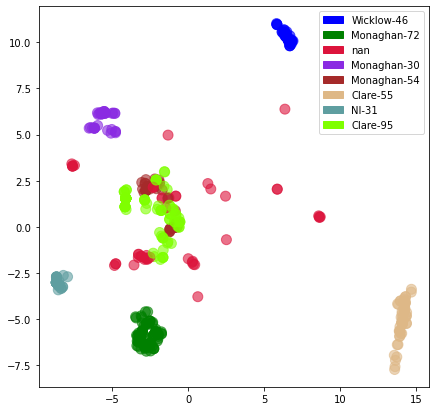

In [264]:
import sklearn
from sklearn import decomposition
from sklearn import manifold

pca = decomposition.PCA(n_components=3)
mds = manifold.MDS(n_components=3)
pos = mds.fit(C).embedding_
X = pca.fit_transform(pos)
#X = pca.transform(C)
df=pd.DataFrame(X)
df['sb']=sb
df.to_csv('/storage/btbgenie/all_ireland_results/pca_snp.csv')

fig,ax = plt.subplots(figsize=(7, 7))
sc=ax.scatter(X[:, 0], X[:, 1], c=colors1, s=100, alpha=.6)    
ax.legend(handles=pts,loc='best')
fig.savefig('/storage/btbgenie/all_ireland_results/pca_snp_clusters.jpg',dpi=150)